In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

from utils import *

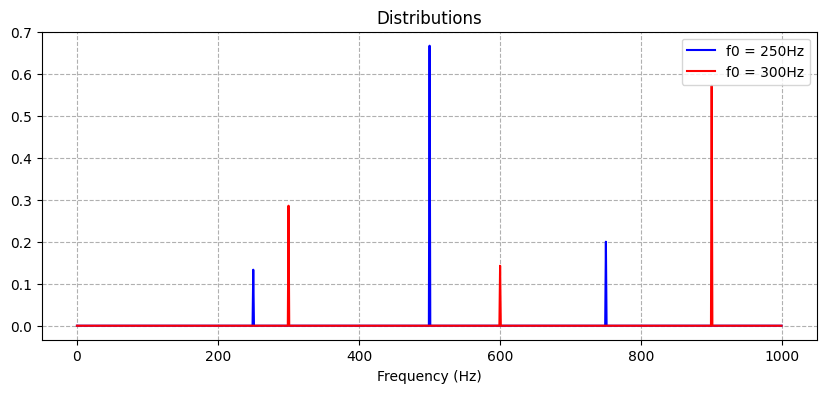

In [2]:
# Define dirac distributions

dirac_size = 1000

dirac_f1 = dirac_size * 0.25
dirac_f2 = dirac_size * 0.3

dirac_1 = dirac_distribution([dirac_f1, dirac_f1*2, dirac_f1*3], [0.2, 1, 0.3], n=dirac_size)
dirac_2 = dirac_distribution([dirac_f2, dirac_f2*2, dirac_f2*3], [1, 0.5, 2], n=dirac_size)

frequency = np.arange(dirac_size)

plt.figure(figsize=[10, 4])

# Use line plots for a cleaner look
plt.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)

plt.xlabel('Frequency (Hz)')
plt.title('Distributions')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.show()

## Optimal transport

In [3]:
# Optimal transport

alpha = 0.5

# Quantile method 

dirac_quantile_interpolation = quantile_optimal_transport(dirac_1, dirac_2, alpha=alpha)

# EMD 

dirac_emd_interpolation = emd_optimal_transport(frequency, dirac_1, dirac_2, alpha=alpha)


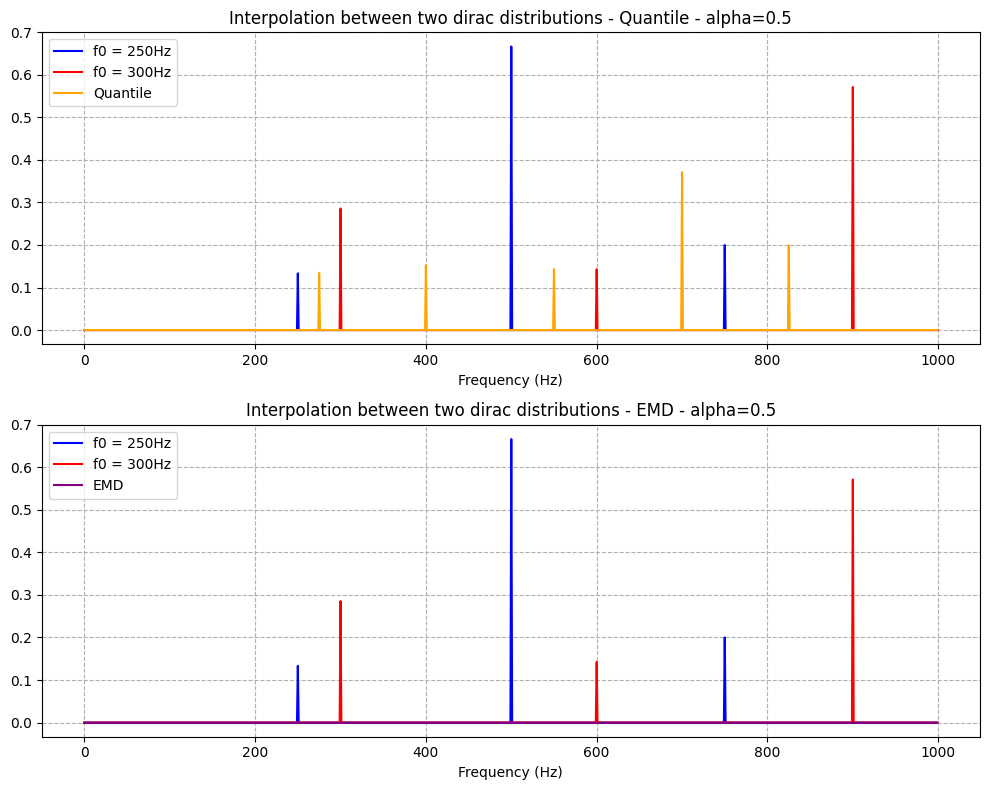

In [4]:
plt.figure(figsize=[10, 8])  # Increase figure size to accommodate both subplots

# First subplot for A, C, and quantile interpolation
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)
plt.plot(frequency, dirac_quantile_interpolation, label='Quantile', color="orange")
plt.xlabel('Frequency (Hz)')
plt.title(f'Interpolation between two dirac distributions - Quantile - alpha={alpha}')
plt.grid(True, which="both", ls="--")
plt.legend()

# Second subplot for A, C, and EMD interpolation
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)
plt.plot(frequency, dirac_emd_interpolation, label='EMD', color="purple")
plt.xlabel('Frequency (Hz)')
plt.title(f'Interpolation between two dirac distributions - EMD - alpha={alpha}')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()  # Adjust the layout so the plots are neatly arranged
plt.show()

## Animations

MovieWriter ffmpeg unavailable; using Pillow instead.


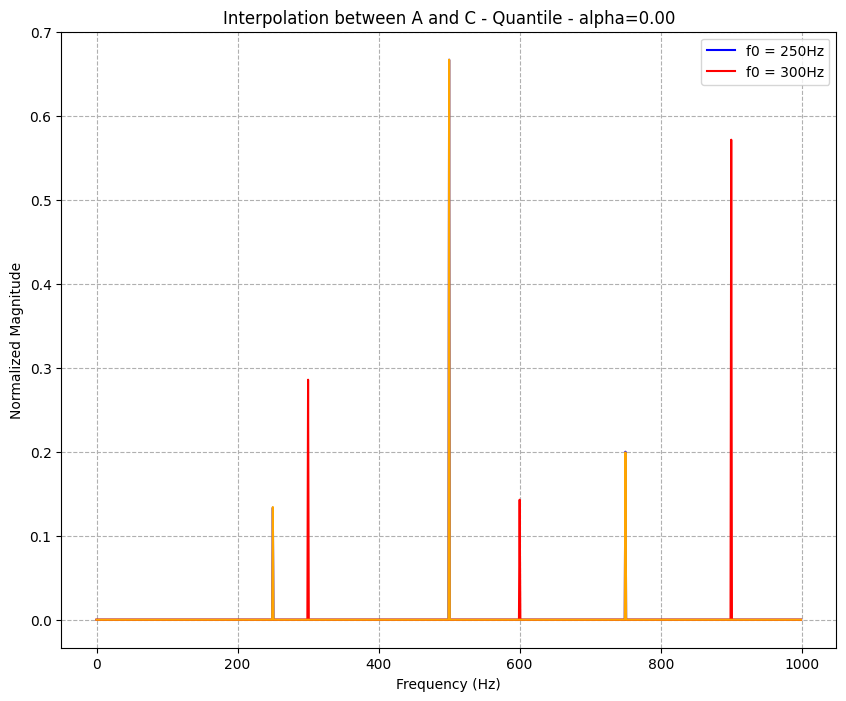

In [5]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
ax.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)
ax.set(xlabel='Frequency (Hz)', ylabel='Normalized Magnitude', title='Interpolation between two dirac distributions - Quantile - alpha={alpha}')
ax.grid(True, which="both", ls="--")
ax.legend()

# Placeholder for the quantile interpolation plot, initially not visible
quantile_line, = ax.plot([], [], label='Quantile', color="orange")

def update(frame):
    # Calculate new alpha for this frame
    alpha = frame / 40.0  # Assuming 40 frames to go from 0 to 1
    
    # Recalculate quantile interpolation with the new alpha
    dirac_quantile_interpolation = quantile_optimal_transport(dirac_1, dirac_2, alpha=alpha)
    
    # Update the data for the quantile interpolation plot
    quantile_line.set_data(frequency, dirac_quantile_interpolation)
    
    # Update the title to reflect the current alpha
    ax.set_title(f'Interpolation between A and C - Quantile - alpha={alpha:.2f}')
    
    return quantile_line,

# Create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=np.arange(0, 41), interval=100)

# Save the animation
ani.save('animations/diracs/quantile_interpolation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


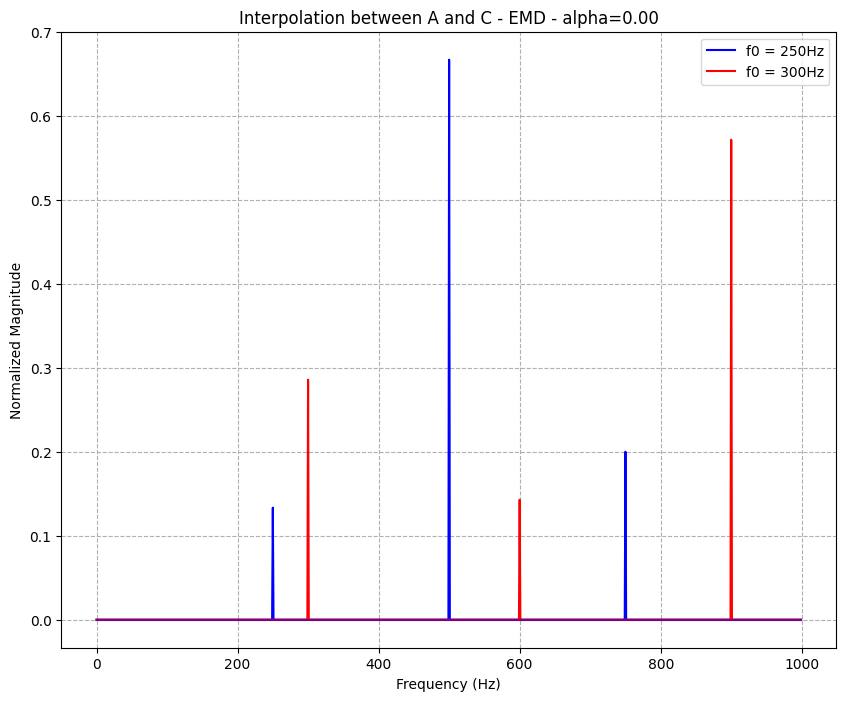

In [6]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
ax.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)
ax.set(xlabel='Frequency (Hz)', ylabel='Normalized Magnitude', title='Interpolation between two dirac distributions - EMD - alpha={alpha}')
ax.grid(True, which="both", ls="--")
ax.legend()

emd_line, = ax.plot([], [], label='ELD', color="purple")

def update(frame):
    alpha = frame / 40.0  # Assuming 40 frames to go from 0 to 1
    
    dirac_emd_interpolation = emd_optimal_transport(frequency, dirac_1, dirac_2, alpha=alpha)
    
    emd_line.set_data(frequency, dirac_emd_interpolation)
    
    ax.set_title(f'Interpolation between A and C - EMD - alpha={alpha:.2f}')
    
    return emd_line,

# Create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=np.arange(0, 41), interval=100)

# Save the animation
ani.save('animations/diracs/emd_interpolation.gif')